In [1]:
import os
import time
import string

import numpy as np
import pandas as pd

from datetime import datetime, timedelta
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates

from tqdm import tqdm

# Font
from matplotlib import font_manager
font_path = "/workspace/fonts/"
font_list = os.listdir(font_path)
for font_file in font_list:
    try:
        font_manager.fontManager.addfont(font_path + font_file)
    except:
        raise Exception(f"Cannot Load {font_path+font_file}")


'''
N_ROW = 1
N_COL = 2
X_SIZE = 6
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

x.plot('value', cmap='Blues', ax=ax, legend=True)
plt.title('Total Amount of Fundings [KRW]')
plt.text(133.3, 38.7, 'log10', fontsize=8)
plt.ylabel('lat')
plt.xlabel('lon')

axi=1
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')
plt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')
plt.ylabel('Total Amount of Fundings [KRW]')
plt.xlabel('Rank of Area')
plt.yscale('log')
'''

"\nN_ROW = 1\nN_COL = 2\nX_SIZE = 6\nY_SIZE = 4\nDPI = 300\n# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']\nplt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']\n\nfig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)\nspec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)\naxes = []\n\naxi=0\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\n\nx.plot('value', cmap='Blues', ax=ax, legend=True)\nplt.title('Total Amount of Fundings [KRW]')\nplt.text(133.3, 38.7, 'log10', fontsize=8)\nplt.ylabel('lat')\nplt.xlabel('lon')\n\naxi=1\nax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col\nax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')\nplt.plot(10**x.sort_values('value')['value'].values[::-1], 'o-')\nplt.ylabel('Total Amount of Fundings [KRW]')\

In [9]:
path = '/workspace/1.3.1.GitHub/Data_mid/'
f = "2022-01-PullRequestEvent.parquet"
# f = "2013-PullRequestEvent.parquet"

df = pd.read_parquet(f"{path}{f}")

In [56]:
cols = ["date", "actor__name", "repo__name", "org__name", 
        "PR_base_user_type", "PR_base_stars", "PR_base_forks", 
        "PR_base_language", "PR_base_open_issues"]

In [57]:
df[cols].to_parquet("./SampleData-2022-01-PullRequestEvent.parquet")

In [58]:
df = df[cols]

In [59]:
df

,date,actor__name,repo__name,org__name,PR_base_user_type,PR_base_stars,PR_base_forks,PR_base_language,PR_base_open_issues
0,2022-01-01 00:00:00+00:00,brunosana,brunosana/bet-management-backend,None,User,2,0,TypeScript,4
1,2022-01-01 00:00:01+00:00,RyanGor,RyanGor/ryangor.com,None,User,0,0,JavaScript,0
2,2022-01-01 00:00:04+00:00,athorat940,athorat940/jenkins-pipeline-tutorial,None,User,0,1,Shell,1
3,2022-01-01 00:00:04+00:00,tbellenger,tbellenger/coding-bc-project-2,None,User,0,0,JavaScript,5
4,2022-01-01 00:00:05+00:00,github-actions[bot],beadth/RSSHub,None,User,0,0,JavaScript,0
...,...,...,...,...,...,...,...,...,...
5751477,2022-01-31 23:21:03+00:00,dependabot[bot],bonukai/MediaTracker,None,User,91,3,TypeScript,6
5751478,2022-01-31 23:21:04+00:00,millieTime,AlanWangsgard/EducationalGame,None,User,0,0,Python,0
5751479,2022-01-31 23:21:04+00:00,TimStewartJ,LibreTexts/ckeditor-binder-plugin,LibreTexts,Organization,4,1,JavaScript,16
5751480,2022-01-31 23:21:04+00:00,dependabot[bot],infrablocks/docker-gemstash-aws,infrablocks,Organization,0,0,Ruby,3


In [60]:
pull_cnt_repo = df.repo__name.value_counts()

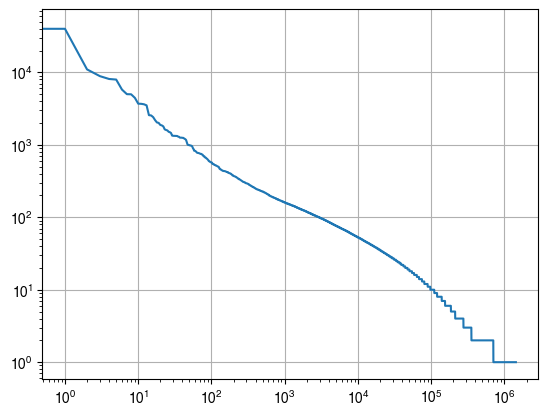

In [61]:
pull_cnt_repo.reset_index()["count"].plot()
plt.xscale("log")
plt.yscale("log")

plt.grid("both")

In [62]:
pull_cnt_org = df.org__name.value_counts()

In [63]:
pull_cnt_actor = df.actor__name.value_counts()

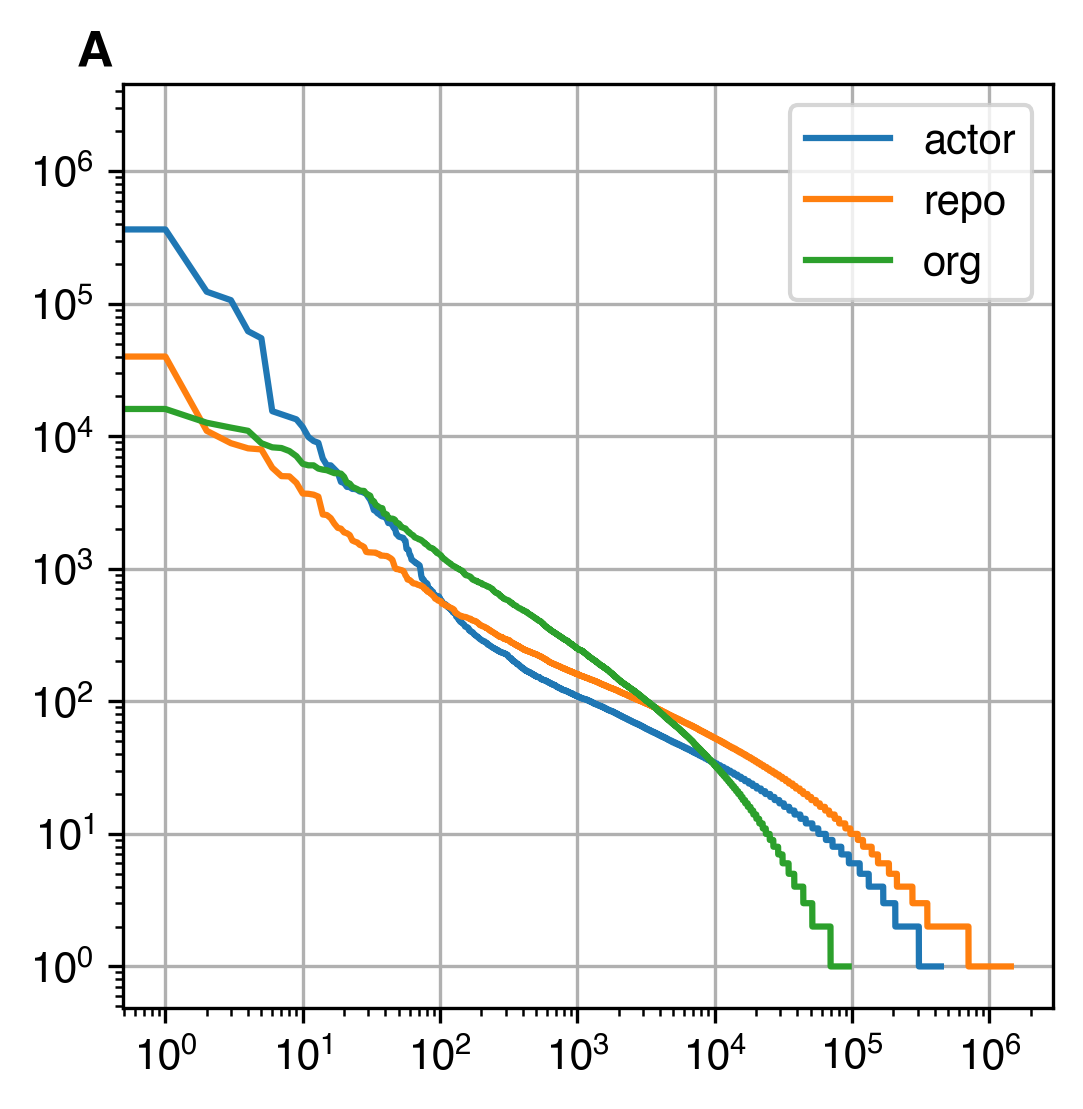

In [64]:
N_ROW = 1
N_COL = 1
X_SIZE = 4
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

pull_cnt_actor.reset_index()["count"].plot(ax=ax, label="actor")
pull_cnt_repo.reset_index()["count"].plot(ax=ax, label="repo")
pull_cnt_org.reset_index()["count"].plot(ax=ax, label="org")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid("both")

In [65]:
pull_cnt_repo.iloc[:20]

repo__name
WolseyBankWitness/rediffusion                43451
mhutchinson/mhutchinson-distributor          39970
google-test/signclav2-probe-repo             10999
actions-canary/ForkPRCanary                   8873
test-organization-kkjeer/bot-validation-2     8112
test-organization-kkjeer/app-test-2           7962
microsoft/winget-pkgs                         5789
NixOS/nixpkgs                                 5007
solana-labs/token-list                        4984
itsprivate/ts-new                             4453
GuruCICDCanary-Prod-Release/CICDCanary        3700
GuruCICDCanary-Prod/CICDCanary                3683
GuruCICDCanary-Beta/CICDCanary                3628
saby/wasaby-controls                          3507
Homebrew/homebrew-core                        2570
openshift-helm-charts/sandbox                 2546
JuliaRegistries/General                       2412
Homebrew/homebrew-cask                        2190
semgrep/test-end-to-end-app                   2038
OPS-E2E-PPE/E2E_DocF

In [66]:
df[msk_repo]

,date,actor__name,repo__name,org__name,PR_base_user_type,PR_base_stars,PR_base_forks,PR_base_language,PR_base_open_issues
243,2022-01-01 00:01:03+00:00,wingetbot,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,364
2991,2022-01-01 00:11:13+00:00,OfficialEsco,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,365
3119,2022-01-01 00:12:12+00:00,msftbot[bot],microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,364
3884,2022-01-01 00:18:15+00:00,wingetbot,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,365
4501,2022-01-01 00:23:58+00:00,msftbot[bot],microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,364
...,...,...,...,...,...,...,...,...,...
5732881,2022-01-31 18:12:26+00:00,msftbot[bot],microsoft/winget-pkgs,microsoft,Organization,5323,1903,PowerShell,482
5742661,2022-01-31 21:04:26+00:00,wingetbot,microsoft/winget-pkgs,microsoft,Organization,5322,1904,PowerShell,480
5744206,2022-01-31 21:09:08+00:00,wingetbot,microsoft/winget-pkgs,microsoft,Organization,5322,1904,PowerShell,481
5744668,2022-01-31 23:00:08+00:00,msftbot[bot],microsoft/winget-pkgs,microsoft,Organization,5322,1904,PowerShell,479


In [67]:
msk_bot = df.actor__name.str.contains("bot") == False
msk_repo = df.repo__name == "microsoft/winget-pkgs"
df[msk_bot & msk_repo]

,date,actor__name,repo__name,org__name,PR_base_user_type,PR_base_stars,PR_base_forks,PR_base_language,PR_base_open_issues
2991,2022-01-01 00:11:13+00:00,OfficialEsco,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,365
6008,2022-01-01 00:40:48+00:00,vedantmgoyal2009,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,364
9516,2022-01-01 01:05:00+00:00,ykh-1992,microsoft/winget-pkgs,microsoft,Organization,5204,1841,PowerShell,365
16861,2022-01-01 02:08:35+00:00,vedantmgoyal2009,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,368
26343,2022-01-01 03:19:43+00:00,vedantmgoyal2009,microsoft/winget-pkgs,microsoft,Organization,5204,1840,PowerShell,369
...,...,...,...,...,...,...,...,...,...
5703721,2022-01-31 14:32:03+00:00,jedieaston,microsoft/winget-pkgs,microsoft,Organization,5323,1902,PowerShell,498
5720284,2022-01-31 17:09:35+00:00,KaranKad,microsoft/winget-pkgs,microsoft,Organization,5323,1903,PowerShell,496
5721015,2022-01-31 17:11:48+00:00,KaranKad,microsoft/winget-pkgs,microsoft,Organization,5323,1903,PowerShell,497
5722899,2022-01-31 17:18:13+00:00,vedantmgoyal2009,microsoft/winget-pkgs,microsoft,Organization,5323,1903,PowerShell,500


In [68]:
df[msk_bot].actor__name.value_counts()

actor__name
direwolf-github              54947
rmayr                        15477
WolseyBankWitness            13986
guru-dev-cicd-canary-beta    11760
scala-steward                 8935
                             ...  
yassirtouab                      1
SzymonKowalczyk                  1
nicoladalbello2                  1
jthurner                         1
momimomo                         1
Name: count, Length: 441650, dtype: int64

In [69]:
df_unq = df.drop_duplicates("repo__name", keep='last')

In [70]:
df_unq.sort_values("PR_base_stars")[::-1].iloc[:20]

,date,actor__name,repo__name,org__name,PR_base_user_type,PR_base_stars,PR_base_forks,PR_base_language,PR_base_open_issues
5721568,2022-01-31 17:13:50+00:00,ieahleen,freeCodeCamp/freeCodeCamp,freeCodeCamp,Organization,339737,27868,JavaScript,166
4631215,2022-01-25 08:10:45+00:00,Z-fly,996icu/996.ICU,None,User,260555,21450,None,16732
5718131,2022-01-31 17:03:24+00:00,eshellman,EbookFoundation/free-programming-books,EbookFoundation,Organization,220331,47053,None,29
5517618,2022-01-30 18:34:43+00:00,jwasham,jwasham/coding-interview-university,None,User,205468,55462,None,39
4202602,2022-01-22 15:54:06+00:00,hardfist,vuejs/vue,vuejs,Organization,192515,31256,JavaScript,554
5618619,2022-01-31 07:46:31+00:00,ehsanghaffarii,sindresorhus/awesome,None,User,187193,22722,None,40
5746885,2022-01-31 23:06:50+00:00,uriell,kamranahmedse/developer-roadmap,None,User,185018,26649,TypeScript,103
5639975,2022-01-31 09:59:44+00:00,maratkhambelov,facebook/react,facebook,Organization,181629,36945,JavaScript,937
5547909,2022-01-31 00:47:50+00:00,matheusfelipeog,public-apis/public-apis,public-apis,Organization,178449,20549,Python,11
5697170,2022-01-31 14:10:54+00:00,gbaned,tensorflow/tensorflow,tensorflow,Organization,162548,86265,C++,2537


In [82]:
stars = df_unq["PR_base_stars"]
forks = df_unq["PR_base_forks"]
issues = df_unq["PR_base_open_issues"]

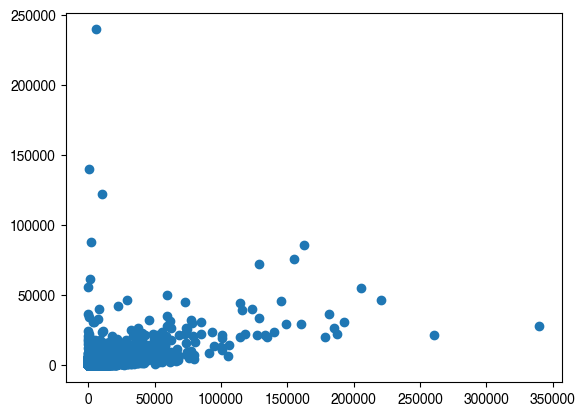

In [77]:
plt.scatter(stars, forks)

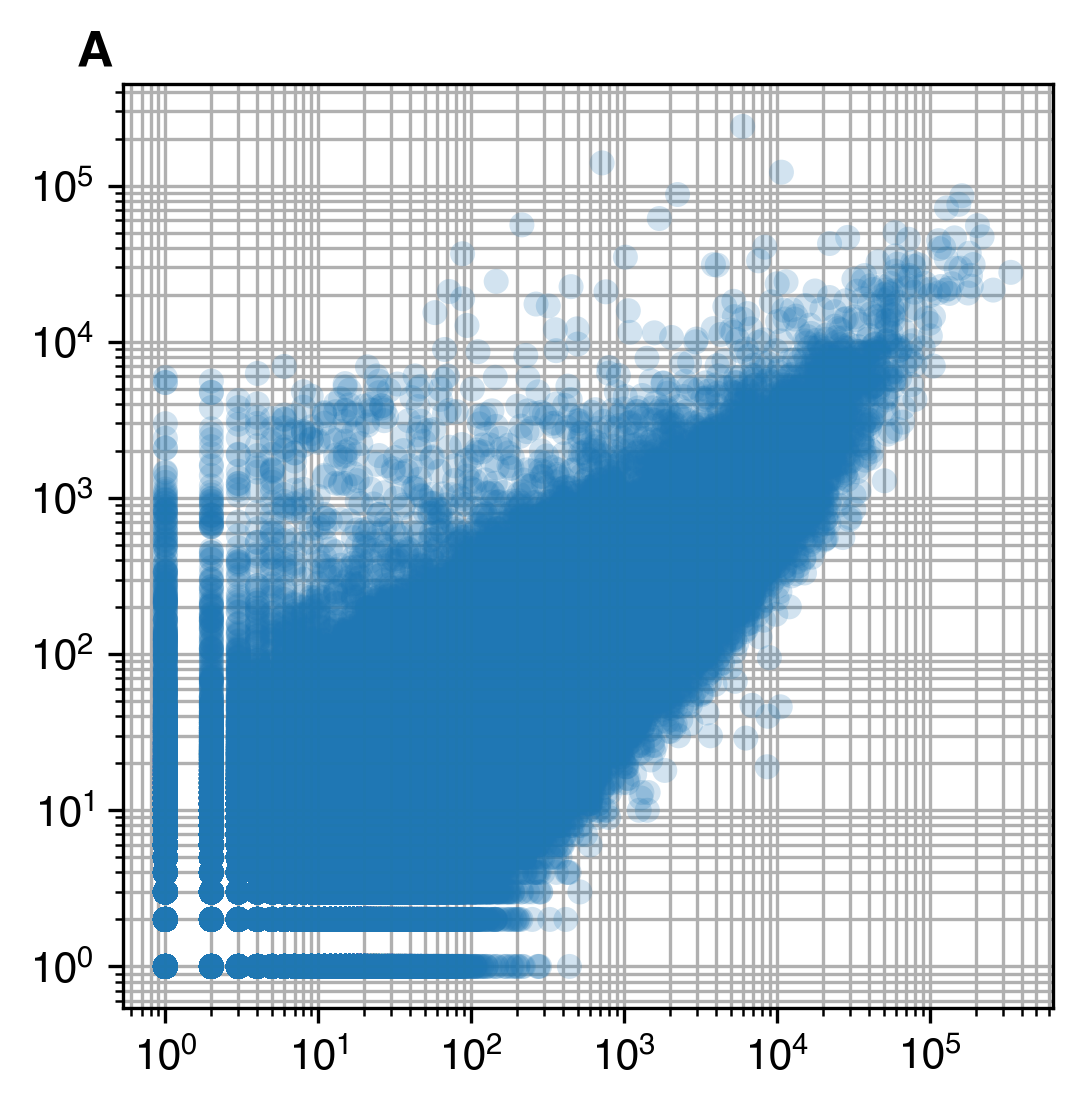

In [81]:
N_ROW = 1
N_COL = 1
X_SIZE = 4
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

plt.scatter(stars, forks, zorder=5, alpha=.2, edgecolor="none")

# plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both", zorder=0)

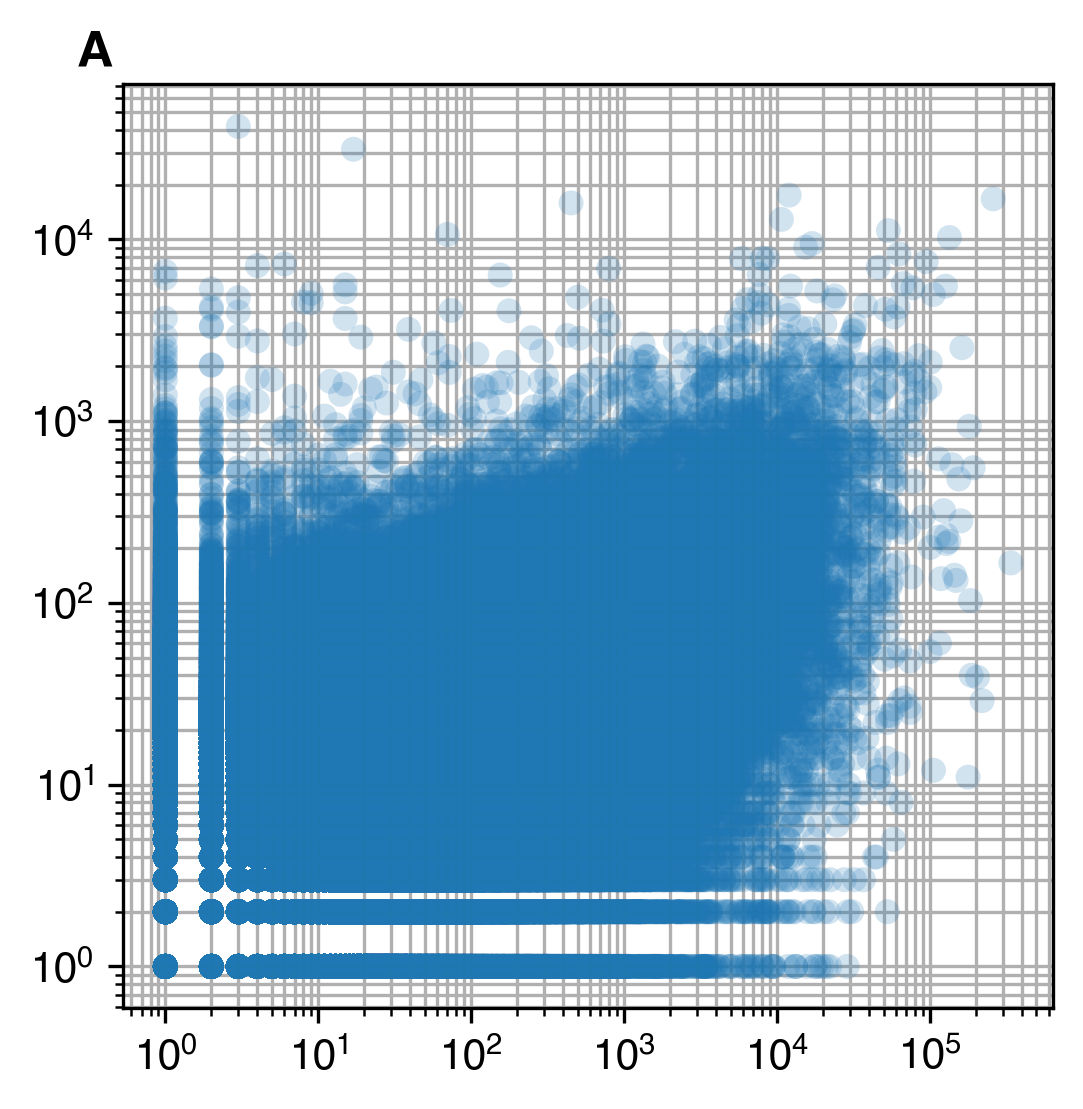

In [83]:
N_ROW = 1
N_COL = 1
X_SIZE = 4
Y_SIZE = 4
DPI = 300
# plt.rcParams['font.family'] = ['NanumSquare', 'Helvetica']
plt.rcParams['font.family'] = ['Helvetica', 'NanumSquare']

fig=plt.figure(figsize = (X_SIZE*N_COL,Y_SIZE*N_ROW), dpi=DPI)
spec = gridspec.GridSpec(ncols=N_COL, nrows=N_ROW, figure=fig)#, width_ratios=[1,1,.1], wspace=.3)
axes = []

axi=0
ax = fig.add_subplot(spec[axi//N_COL,axi%N_COL]) # row, col
ax.text(-.05, 1.02, '%s'%(string.ascii_uppercase[axi]), transform=ax.transAxes, size=12, weight='bold')

plt.scatter(stars, issues, zorder=5, alpha=.2, edgecolor="none")

# plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.grid(which="both", zorder=0)

In [86]:
msk_star = df.PR_base_stars > 10
df[msk_star].to_parquet('sample.parquet')